# My notebook for the Kaggle competition dealing with house price predictions

author: Benjamin W. Sturm  <br />
contact: bwsturm@gmail.com <br />
date: Nov 2017

In [223]:
import numpy as np
import scipy as sp
import pandas as pd

In [224]:
house_df = pd.read_csv("train.csv")

In [225]:
house_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [218]:
#print(house_df.loc[:5,:])

In [226]:
# here I'm setting the 'Id' feature as the DataFrame index
house_df.set_index('Id',inplace=True)

Next, I'm going to filter out all of the NaN values.  I'm doing that first by dropping columns in which 90% of the values are NaN.  This deletes the majority of the NaN values.  Then, I'm going to manually go through and impute any NaN values.

In [227]:
# dropping any columns in which 90% of the values are NaN
house_df2 = house_df.dropna(thresh=1314,axis=1)

In [228]:
# I stole these functions from Steve on the Kaggle competition site
# To check which columns have missing values:
def show_missing(df):
    missing = df.columns[df.isnull().any()].tolist()
    return missing

# Imputing the missing values
def cat_imputation(df, column, value):
    df.loc[df[column].isnull(),column] = value

In [229]:
show_missing(house_df2)

['MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [230]:
# function to manually replace all the nans
def replace_nans(df_house):
    cat_imputation(df_house,'MasVnrType','None')
    #df_house['MasVnrType'].fillna('None',inplace=True)
    cat_imputation(df_house,'MasVnrArea',0)
    #df_house['MasVnrArea'].fillna('None',inplace=True)
    
    basement_cols = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
    
    for col in basement_cols:
        cat_imputation(df_house,col,'None')
        
    garage_cols = ['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond'] 
    
    for i in garage_cols:
        if df_house[i].dtype==np.object:
            cat_imputation(df_house,i,'None')
        else:
            cat_imputation(df_house,i, 0)
    
    return df_house  

house_df3 = replace_nans(house_df2)

/Users/bwsturm/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [60]:
#house_df3['BsmtQual'].isnull().sum()

In [231]:
show_missing(house_df3)

['Electrical']

In [232]:
house_df3['Electrical'].isnull().sum()

1

After running replace_nans() on the data frame, there is only one feature left ('Electrical') which has NaNs.  Since it is just one row, I can replace it with the majority class.   

In [233]:
house_df3['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [234]:
cat_imputation(house_df3,'Electrical','SBrkr')
show_missing(house_df3)

/Users/bwsturm/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


[]

Now we need to go through the House Price DataFrame to encode all of the columns with categorical features.  I will be doing the One-hot encoding technique found in the ML reference book page 221.

In [61]:
#house_df3.dtypes

In [235]:
house_df4 = pd.get_dummies(house_df3)
house_df4.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,8450,7,5,2003,2003,196.0,706,0,150,...,0,0,0,1,0,0,0,0,1,0
2,20,9600,6,8,1976,1976,0.0,978,0,284,...,0,0,0,1,0,0,0,0,1,0
3,60,11250,7,5,2001,2002,162.0,486,0,434,...,0,0,0,1,0,0,0,0,1,0
4,70,9550,7,5,1915,1970,0.0,216,0,540,...,0,0,0,1,1,0,0,0,0,0
5,60,14260,8,5,2000,2000,350.0,655,0,490,...,0,0,0,1,0,0,0,0,1,0


In [237]:
y = house_df4['SalePrice']  # setting y to be the target value (e.g., 'SalePrice')
X = house_df4.drop('SalePrice',axis=1) # setting X to be everything but the target value
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [238]:
y.head()

Id
1    208500
2    181500
3    223500
4    140000
5    250000
Name: SalePrice, dtype: int64

First, I'm going to use a Linear Model to predict Sale Prices.  The model I selected is Ridge regression which does regularization of the weight coefficients (w).

In [239]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

linridge = Ridge().fit(X_train,y_train)
print("Training set score: {:.2f}".format(linridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(linridge.score(X_test, y_test)))

Training set score: 0.94
Test set score: 0.70


Without doing any tweaking of the Ridge regression model, we are getting a score of 0.70 on the test dataset.  However, the difference in the training set score and the test set score, shows that we are likely overfitting the our data.  In order to reduce overfitting, we increase our alpha from the default value of 1.0.  Let's try out 5, 10, 20, 50, and 100.

In [240]:
linridge5 = Ridge(alpha=5).fit(X_train,y_train)
print("Training set score: {:.2f}".format(linridge5.score(X_train, y_train)))
print("Test set score: {:.2f}".format(linridge5.score(X_test, y_test)))

Training set score: 0.92
Test set score: 0.75


In [241]:
linridge10 = Ridge(alpha=10).fit(X_train,y_train)
print("Training set score: {:.2f}".format(linridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(linridge10.score(X_test, y_test)))

Training set score: 0.92
Test set score: 0.75


In [242]:
linridge20 = Ridge(alpha=20).fit(X_train,y_train)
print("Training set score: {:.2f}".format(linridge20.score(X_train, y_train)))
print("Test set score: {:.2f}".format(linridge20.score(X_test, y_test)))

Training set score: 0.91
Test set score: 0.75


In [243]:
linridge50 = Ridge(alpha=50).fit(X_train,y_train)
print("Training set score: {:.2f}".format(linridge50.score(X_train, y_train)))
print("Test set score: {:.2f}".format(linridge50.score(X_test, y_test)))

Training set score: 0.90
Test set score: 0.74


In [244]:
linridge100 = Ridge(alpha=100).fit(X_train,y_train)
print("Training set score: {:.2f}".format(linridge100.score(X_train, y_train)))
print("Test set score: {:.2f}".format(linridge100.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.73


In [302]:
#A function to calculate Root Mean Squared Logarithmic Error (RMSLE)
def rmsle(y_true, y_pred):
    terms_to_sum = (np.log(y_true)-np.log(y_pred))**2
    return (sum(terms_to_sum) * (1.0/len(y_true.index))) ** 0.5

rmsle(y_test,linridge10.predict(X_test))

0.15855915891169772

Based on the results above, our best score is 0.75 using an alpha of 10.  This is the model I will use for making predictions on the test data.  Now I need to read in and do some preprocessing on the test data.

In [246]:
test_df = pd.read_csv("test.csv")

In [247]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [248]:
test_df.set_index('Id',inplace=True)

In [249]:
# reindexing test_df such that the columns conform to the same as house_df2
test_df = test_df.reindex(columns=house_df3.columns)
test_df = test_df.drop('SalePrice',axis=1)

In [250]:
show_missing(test_df)

['MSZoning',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'SaleType']

Now we need to go through and replace the NaN values.  After running show_missing() above, we see that there are additional columns that have NaNs in the test data versus the training data.  I'm not sure if that will lead to problems or not.

In [251]:
test_df2 = replace_nans(test_df)

In [252]:
show_missing(test_df2)

['MSZoning',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'GarageCars',
 'GarageArea',
 'SaleType']

In [80]:
test_df2['MSZoning'].isnull().sum()

4

The above command shows the 'MSZoning' feature only has 4 NaN values, so I'm not too concerned about it.  I will just replace these rows with the most common class.

In [253]:
test_df2['MSZoning'].value_counts()

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

In [254]:
#replacing NaN values in the MSZoning column with the most common category 'RL'
cat_imputation(test_df2,'MSZoning','RL')

In [255]:
# %load 80
test_df2['Utilities'].isnull().sum()

2

In [256]:
# %load 82
test_df2['Utilities'].value_counts()

AllPub    1457
Name: Utilities, dtype: int64

In [257]:
# %load 83
#replacing NaN values in the Utilities column with the most common category 'AllPub'
cat_imputation(test_df2,'Utilities','AllPub')

In [258]:
# %load 80
test_df2['Exterior1st'].isnull().sum()

1

In [259]:
# %load 82
test_df2['Exterior1st'].value_counts()

VinylSd    510
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
BrkComm      4
AsphShn      1
CBlock       1
Name: Exterior1st, dtype: int64

In [260]:
# %load 90
#replacing NaN values in the Exterior1st column with the most common category 'VinylSd'
cat_imputation(test_df2,'Exterior1st','VinylSd')

In [261]:
test_df2['Exterior2nd'].isnull().sum()
test_df2['Exterior2nd'].value_counts()

VinylSd    510
MetalSd    233
HdBoard    199
Wd Sdng    194
Plywood    128
CmentBd     66
Wd Shng     43
BrkFace     22
Stucco      21
AsbShng     18
Brk Cmn     15
ImStucc      5
CBlock       2
AsphShn      1
Stone        1
Name: Exterior2nd, dtype: int64

In [262]:
cat_imputation(test_df2,'Exterior2nd','VinylSd')

In [263]:
# %load 99
test_df2['BsmtFinSF1'].isnull().sum()
#test_df2['BsmtFinSF1'].value_counts()

1

In [264]:
basementsf_cols = ['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']

In [265]:
for col in basementsf_cols:
    cat_imputation(test_df2,col,0.0)

In [266]:
show_missing(test_df2)

['BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'GarageCars',
 'GarageArea',
 'SaleType']

In [267]:
# %load 99
#test_df2['BsmtFullBath'].isnull().sum()
test_df2['BsmtFullBath'].value_counts()

0.0    849
1.0    584
2.0     23
3.0      1
Name: BsmtFullBath, dtype: int64

In [268]:
basement_bath_cols = ['BsmtFullBath','BsmtHalfBath']

for col in basement_bath_cols:
    cat_imputation(test_df2,col,0.0)

In [269]:
# %load 99
#test_df2['KitchenQual'].isnull().sum()
test_df2['KitchenQual'].value_counts().index[0]

'TA'

In [270]:
cat_imputation(test_df2,'KitchenQual','TA')

In [271]:
# This is a small function I wrote to replace all NaN values in a column with the most common value
def cat_impute_most_common(df,column):
    most_common_val = df[column].value_counts().index[0]
    if df[column].dtype == np.object:
        df.loc[df[column].isnull(),column] = most_common_val
    else:
        df.loc[df[column].isnull(),column] = most_common_val.astype(int)

In [272]:
show_missing(test_df)

['Functional', 'GarageCars', 'GarageArea', 'SaleType']

In [273]:
# %load 99
test_df2['GarageCars'].isnull().sum()
test_df2['GarageCars'].value_counts()

2.0    770
1.0    407
3.0    193
0.0     76
4.0     11
5.0      1
Name: GarageCars, dtype: int64

In [274]:
cat_impute_most_common(test_df2,'Functional')

In [275]:
cat_impute_most_common(test_df2,'GarageCars')

In [276]:
test_df2['GarageCars'].value_counts()

2.0    771
1.0    407
3.0    193
0.0     76
4.0     11
5.0      1
Name: GarageCars, dtype: int64

In [277]:
cat_impute_most_common(test_df2,'GarageArea')
cat_impute_most_common(test_df2,'SaleType')

In [278]:
show_missing(test_df2)

[]

Confirmation that all NaNs of the test data have been replaced. Now we need to go through the DataFrame to encode all of the columns with categorical features.

In [280]:
test_df3 = pd.get_dummies(test_df2)
test_df3.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,1,0,0,0,0,1,0
1462,20,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,1,0,0,0,0,1,0
1463,60,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,1,0,0,0,0,1,0
1464,60,9978,6,6,1998,1998,20.0,602.0,0.0,324.0,...,0,0,0,1,0,0,0,0,1,0
1465,120,5005,8,5,1992,1992,0.0,263.0,0.0,1017.0,...,0,0,0,1,0,0,0,0,1,0


In [281]:
test_df3 = test_df3.reindex(columns=X.columns,fill_value=0)
test_df3.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,1,0,0,0,0,1,0
1462,20,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,1,0,0,0,0,1,0
1463,60,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,1,0,0,0,0,1,0
1464,60,9978,6,6,1998,1998,20.0,602.0,0.0,324.0,...,0,0,0,1,0,0,0,0,1,0
1465,120,5005,8,5,1992,1992,0.0,263.0,0.0,1017.0,...,0,0,0,1,0,0,0,0,1,0


In [282]:
#np.shape(test_df3)
#np.shape(house_df4)
np.shape(X_train)

(1095, 278)

In [288]:
# Now I will be making a prediction on the test data using the linridge model we selected.

house_price_prediction = linridge10.predict(test_df3)

In [289]:
np.shape(house_price_prediction)

(1459,)

In [290]:
house_price_prediction[:10]

array([ 106804.38105045,  159458.8248512 ,  180697.90570205,
        193447.39851751,  192219.24859057,  170910.74043459,
        183108.11047361,  159333.56866794,  205039.87283766,
        114863.59333707])

In [291]:
price_predict_df = pd.DataFrame(house_price_prediction,index=test_df.index,columns=['SalePrice']) 

In [292]:
price_predict_df.head()

,SalePrice
Id,
1461,106804.381050
1462,159458.824851
1463,180697.905702
1464,193447.398518
1465,192219.248591


In [294]:
price_predict_df.to_csv('house_price_submission_Ridge10_bsturm.csv')

Now I'd like to try fitting the data using a Lasso model

In [295]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train,y_train)

print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.94
Test set score: 0.64
Number of features used: 240


/Users/bwsturm/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


It's pretty clear, we are overfitting the data.  So, we will try to increase alpha from the default value of 1.  I'll try alpha of 5,10,20,50,100, and 1000.

In [296]:
lasso5 = Lasso(alpha=5).fit(X_train,y_train)

print("Training set score: {:.2f}".format(lasso5.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso5.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso5.coef_ != 0)))

Training set score: 0.94
Test set score: 0.64
Number of features used: 224


In [297]:
lasso10 = Lasso(alpha=10).fit(X_train,y_train)

print("Training set score: {:.2f}".format(lasso10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso10.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso10.coef_ != 0)))

Training set score: 0.94
Test set score: 0.65
Number of features used: 201


In [298]:
# %load 198
lasso20 = Lasso(alpha=20).fit(X_train,y_train)

print("Training set score: {:.2f}".format(lasso20.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso20.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso20.coef_ != 0)))

Training set score: 0.94
Test set score: 0.66
Number of features used: 175


In [299]:
# %load 198
lasso50 = Lasso(alpha=50).fit(X_train,y_train)

print("Training set score: {:.2f}".format(lasso50.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso50.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso50.coef_ != 0)))

Training set score: 0.94
Test set score: 0.69
Number of features used: 142


In [300]:
# %load 198
lasso100 = Lasso(alpha=100, max_iter=100000).fit(X_train,y_train)

print("Training set score: {:.2f}".format(lasso100.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso100.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso100.coef_ != 0)))

Training set score: 0.93
Test set score: 0.71
Number of features used: 104


In [301]:
# %load 198
lasso1000 = Lasso(alpha=1000, max_iter=1e5).fit(X_train,y_train)

print("Training set score: {:.2f}".format(lasso1000.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso1000.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso1000.coef_ != 0)))

Training set score: 0.87
Test set score: 0.71
Number of features used: 37


In [303]:
rmsle(y_test,lasso100.predict(X_test))

0.1666947932411208

Lasso does worse than Ridge.  So, let's look at some other regression models.  Next, I'm going to explore Decision Trees.

In [304]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor().fit(X_train, y_train)

print("Training set score: {:.2f}".format(tree.score(X_train, y_train)))
print("Test set score: {:.2f}".format(tree.score(X_test, y_test)))

Training set score: 1.00
Test set score: 0.65


Cool!  We are getting a perfect fit on out training data, but a low R^2 score on our test data.  This is classic overfitting.  In order to improve on this, we will do some pre-pruning of our decision tree by setting either max_depth, max_leaf_nodes, or min_samples_leaf.

In [305]:
tree_maxdep5 = DecisionTreeRegressor(max_depth=5).fit(X_train, y_train)

print("Training set score: {:.2f}".format(tree_maxdep5.score(X_train, y_train)))
print("Test set score: {:.2f}".format(tree_maxdep5.score(X_test, y_test)))

Training set score: 0.87
Test set score: 0.81


In [309]:
tree_maxdep6 = DecisionTreeRegressor(max_depth=6).fit(X_train, y_train)

print("Training set score: {:.2f}".format(tree_maxdep6.score(X_train, y_train)))
print("Test set score: {:.2f}".format(tree_maxdep6.score(X_test, y_test)))

Training set score: 0.91
Test set score: 0.77


In [308]:
tree_maxdep4 = DecisionTreeRegressor(max_depth=4).fit(X_train, y_train)

print("Training set score: {:.2f}".format(tree_maxdep4.score(X_train, y_train)))
print("Test set score: {:.2f}".format(tree_maxdep4.score(X_test, y_test)))

Training set score: 0.82
Test set score: 0.74


Wow!  Decision trees are magical.  Without hardly doing any work, I'm getting a test score of 0.81 using a maximum tree depth of 5.  Out of interest, I'm going to plot the feature importances.

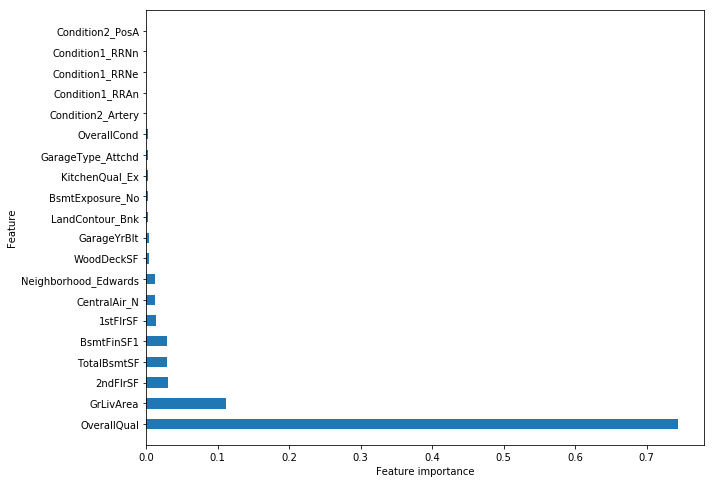

In [335]:
import matplotlib.pyplot as plt

def plot_feature_importances_houseprices(model):
    n_features = X_train.shape[1]
    feature_importance_array = model.feature_importances_
    feature_importance_Series = pd.Series(feature_importance_array,index=X_train.columns)
    feature_importance_Series.sort_values(ascending=False,inplace=True)
    #plt.barh(range(n_features), model.feature_importances_,align='center')
    plt.figure(figsize=(10,8))
    feature_importance_Series[0:20].plot(kind='barh')
    #plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1,20)
    
plot_feature_importances_houseprices(tree_maxdep5)
plt.show()

This plot clearly shows that there are only about 10 features that have significant importance.  I'm surprised how 'OverallQual' dominates in feature importance.

In [336]:
rmsle(y_test,tree_maxdep5.predict(X_test))

0.17977583950478065

Actually, the above RMSLE score is worse than the Ridge regression one.  Just to make sure, I will submit to the Kaggle competition website anyway.

In [337]:
price_prediction_tree = tree_maxdep5.predict(test_df3)
price_predict_tree_df = pd.DataFrame(price_prediction_tree,index=test_df3.index,columns=['SalePrice']) 

In [339]:
price_predict_tree_df.to_csv('house_price_submission_DecisionTree_maxdep5.csv')

Something I'm curious about is whether or not I can just keep the top 20 features with respect to feature_importance and observe similar test scores.  So, let's give it a try.

In [340]:
whos

Variable                               Type                     Data/Info
-------------------------------------------------------------------------
DecisionTreeRegressor                  ABCMeta                  <class 'sklearn.tree.tree.DecisionTreeRegressor'>
Lasso                                  ABCMeta                  <class 'sklearn.linear_mo<...>oordinate_descent.Lasso'>
Ridge                                  ABCMeta                  <class 'sklearn.linear_model.ridge.Ridge'>
X                                      DataFrame                      MSSubClass  LotArea<...>[1460 rows x 278 columns]
X_test                                 DataFrame                      MSSubClass  LotArea<...>n[365 rows x 278 columns]
X_train                                DataFrame                      MSSubClass  LotArea<...>[1095 rows x 278 columns]
basement_bath_cols                     list                     n=2
basementsf_cols                        list                     n=4
cat_imputation 

In [345]:
feature_importance_Series.sort_values(ascending=False,inplace=True)
feature_importance_Series[:10].index

Index(['OverallQual', 'GrLivArea', '2ndFlrSF', 'TotalBsmtSF', 'BsmtFinSF1',
       '1stFlrSF', 'CentralAir_N', 'Neighborhood_Edwards', 'WoodDeckSF',
       'GarageYrBlt'],
      dtype='object')

In [349]:
house_df_select = house_df4.reindex(columns=feature_importance_Series[:20].index)

In [350]:
house_df_select.head()

,OverallQual,GrLivArea,2ndFlrSF,TotalBsmtSF,BsmtFinSF1,1stFlrSF,CentralAir_N,Neighborhood_Edwards,WoodDeckSF,GarageYrBlt,LandContour_Bnk,BsmtExposure_No,KitchenQual_Ex,GarageType_Attchd,OverallCond,Condition1_PosN,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_PosA
Id,,,,,,,,,,,,,,,,,,,,
1,7,1710,854,856,706,856,0,0,0,2003.0,0,1,0,1,5,0,0,0,0,0
2,6,1262,0,1262,978,1262,0,0,298,1976.0,0,0,0,1,8,0,0,0,0,0
3,7,1786,866,920,486,920,0,0,0,2001.0,0,0,0,1,5,0,0,0,0,0
4,7,1717,756,756,216,961,0,0,0,1998.0,0,1,0,0,5,0,0,0,0,0
5,8,2198,1053,1145,655,1145,0,0,192,2000.0,0,0,0,1,5,0,0,0,0,0


In [354]:
y = house_df4['SalePrice']  # setting y to be the target value (e.g., 'SalePrice')
X = house_df_select # setting X to be everything but the target value
X.shape

(1460, 20)

X now only contains 20 features

In [355]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

Now we'll test out the Decision Tree Regression score on the dataset with 20 features only.

In [356]:
tree_maxdep5_20feat = DecisionTreeRegressor(max_depth=5).fit(X_train, y_train)

print("Training set score: {:.2f}".format(tree_maxdep5_20feat.score(X_train, y_train)))
print("Test set score: {:.2f}".format(tree_maxdep5_20feat.score(X_test, y_test)))

Training set score: 0.87
Test set score: 0.78


In [357]:
tree_maxdep6_20feat = DecisionTreeRegressor(max_depth=6).fit(X_train, y_train)

print("Training set score: {:.2f}".format(tree_maxdep6_20feat.score(X_train, y_train)))
print("Test set score: {:.2f}".format(tree_maxdep6_20feat.score(X_test, y_test)))

Training set score: 0.91
Test set score: 0.78


In [359]:
tree_maxdep4_20feat = DecisionTreeRegressor(max_depth=4).fit(X_train, y_train)

print("Training set score: {:.2f}".format(tree_maxdep4_20feat.score(X_train, y_train)))
print("Test set score: {:.2f}".format(tree_maxdep4_20feat.score(X_test, y_test)))

Training set score: 0.82
Test set score: 0.78


In [361]:
tree_maxdep3_20feat = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)

print("Training set score: {:.2f}".format(tree_maxdep3_20feat.score(X_train, y_train)))
print("Test set score: {:.2f}".format(tree_maxdep3_20feat.score(X_test, y_test)))

Training set score: 0.74
Test set score: 0.74


In [365]:
rmsle(y_test,tree_maxdep5_20feat.predict(X_test))

0.18778279547355442

Now we will select the top 20 features for the test data so that we can make a prediction on this data using the previous models

In [366]:
test_df_select = test_df3.reindex(columns=feature_importance_Series[:20].index)

In [367]:
test_df_select.head()

,OverallQual,GrLivArea,2ndFlrSF,TotalBsmtSF,BsmtFinSF1,1stFlrSF,CentralAir_N,Neighborhood_Edwards,WoodDeckSF,GarageYrBlt,LandContour_Bnk,BsmtExposure_No,KitchenQual_Ex,GarageType_Attchd,OverallCond,Condition1_PosN,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_PosA
Id,,,,,,,,,,,,,,,,,,,,
1461,5,896,0,882.0,468.0,896,0,0,140,1961.0,0,1,0,1,6,0,0,0,0,0
1462,6,1329,0,1329.0,923.0,1329,0,0,393,1958.0,0,1,0,1,6,0,0,0,0,0
1463,5,1629,701,928.0,791.0,928,0,0,212,1997.0,0,1,0,1,5,0,0,0,0,0
1464,6,1604,678,926.0,602.0,926,0,0,360,1998.0,0,1,0,1,6,0,0,0,0,0
1465,8,1280,0,1280.0,263.0,1280,0,0,0,1992.0,0,1,0,1,5,0,0,0,0,0


In [369]:
price_prediction_tree_20feat = tree_maxdep5_20feat.predict(test_df_select)
price_predict_tree_df = pd.DataFrame(price_prediction_tree_20feat,index=test_df_select.index,columns=['SalePrice']) 
price_predict_tree_df.to_csv('house_price_submission_DecisionTree_maxdep5_20feat.csv')

Now I want to try out using the Random Forest model.

In [372]:
from sklearn.ensemble import RandomForestRegressor

In [371]:
#loading the original data set with all features
y = house_df4['SalePrice']  # setting y to be the target value (e.g., 'SalePrice')
X = house_df4.drop('SalePrice',axis=1) # setting X to be everything but the target value
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [374]:
random_forest = RandomForestRegressor(n_estimators=10, random_state=0).fit(X_train,y_train)

print("Training set score: {:.2f}".format(random_forest.score(X_train, y_train)))
print("Test set score: {:.2f}".format(random_forest.score(X_test, y_test)))


Training set score: 0.96
Test set score: 0.83


In [375]:
random_forest_nest50 = RandomForestRegressor(n_estimators=50, random_state=0).fit(X_train,y_train)

print("Training set score: {:.2f}".format(random_forest_nest50.score(X_train, y_train)))
print("Test set score: {:.2f}".format(random_forest_nest50.score(X_test, y_test)))


Training set score: 0.98
Test set score: 0.83


In [376]:
random_forest_nest100 = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train,y_train)

print("Training set score: {:.2f}".format(random_forest_nest100.score(X_train, y_train)))
print("Test set score: {:.2f}".format(random_forest_nest100.score(X_test, y_test)))


Training set score: 0.98
Test set score: 0.84


In [377]:
random_forest_nest100_maxdep5 = RandomForestRegressor(n_estimators=100, random_state=0, max_depth=5).fit(X_train,y_train)

print("Training set score: {:.2f}".format(random_forest_nest100_maxdep5.score(X_train, y_train)))
print("Test set score: {:.2f}".format(random_forest_nest100_maxdep5.score(X_test, y_test)))


Training set score: 0.91
Test set score: 0.83


In [378]:
random_forest_nest100_maxdep4 = RandomForestRegressor(n_estimators=100, random_state=0, max_depth=4).fit(X_train,y_train)

print("Training set score: {:.2f}".format(random_forest_nest100_maxdep4.score(X_train, y_train)))
print("Test set score: {:.2f}".format(random_forest_nest100_maxdep4.score(X_test, y_test)))


Training set score: 0.87
Test set score: 0.81


In [379]:
random_forest_nest100_maxdep6 = RandomForestRegressor(n_estimators=100, random_state=0, max_depth=6).fit(X_train,y_train)

print("Training set score: {:.2f}".format(random_forest_nest100_maxdep6.score(X_train, y_train)))
print("Test set score: {:.2f}".format(random_forest_nest100_maxdep6.score(X_test, y_test)))

Training set score: 0.94
Test set score: 0.84


In [380]:
random_forest_nest100_maxdep7 = RandomForestRegressor(n_estimators=100, random_state=0, max_depth=7).fit(X_train,y_train)

print("Training set score: {:.2f}".format(random_forest_nest100_maxdep7.score(X_train, y_train)))
print("Test set score: {:.2f}".format(random_forest_nest100_maxdep7.score(X_test, y_test)))

Training set score: 0.96
Test set score: 0.84


In [386]:
random_forest_nest100_maxdep8 = RandomForestRegressor(n_estimators=100, random_state=0, max_depth=8).fit(X_train,y_train)

print("Training set score: {:.2f}".format(random_forest_nest100_maxdep8.score(X_train, y_train)))
print("Test set score: {:.2f}".format(random_forest_nest100_maxdep8.score(X_test, y_test)))

Training set score: 0.96
Test set score: 0.84


In [381]:
rmsle(y_test,random_forest_nest100.predict(X_test))

0.13786424566639191

This is our best score so far!  Let's submit to the Kaggle site.

In [382]:
price_prediction_random_forest_nest100 = random_forest_nest100.predict(test_df3)
price_predict_random_forest_nest100_df = pd.DataFrame(price_prediction_random_forest_nest100,index=test_df3.index,columns=['SalePrice']) 
price_predict_random_forest_nest100_df.to_csv('house_price_submission_RandomForest_nestimator100.csv')

In [387]:
rmsle(y_test,random_forest_nest100_maxdep8.predict(X_test))

0.13889869674098937

In [388]:
price_prediction_random_forest_nest100_maxdep8 = random_forest_nest100_maxdep8.predict(test_df3)
price_predict_random_forest_nest100_maxdep8_df = pd.DataFrame(price_prediction_random_forest_nest100_maxdep8,index=test_df3.index,columns=['SalePrice']) 
price_predict_random_forest_nest100_maxdep8_df.to_csv('house_price_submission_RandomForest_nestimator100_maxdepth8.csv')

In [389]:
random_forest_nest200 = RandomForestRegressor(n_estimators=200, random_state=0).fit(X_train,y_train)

print("Training set score: {:.2f}".format(random_forest_nest200.score(X_train, y_train)))
print("Test set score: {:.2f}".format(random_forest_nest200.score(X_test, y_test)))


Training set score: 0.98
Test set score: 0.84


In [391]:
# %load 381
rmsle(y_test,random_forest_nest200.predict(X_test))

0.1369750367738588

In [392]:
price_prediction_random_forest_nest200 = random_forest_nest200.predict(test_df3)
price_predict_random_forest_nest200_df = pd.DataFrame(price_prediction_random_forest_nest200,index=test_df3.index,columns=['SalePrice']) 
price_predict_random_forest_nest200_df.to_csv('house_price_submission_RandomForest_nestimator200.csv')

After submitting my results to the Kaggle site, the Random Forest model did slightly worse than the Ridge regression model.  I'm actually a bit surprised by this since the RMSLE score that I calculated on the test data was better for the Random Forest model.  The next model I'd like to try is Gradient boosted trees.  After completing that, I want to try to scale my data for the Ridge model, since I forgot to do that before.

In [393]:
from sklearn.ensemble import GradientBoostingRegressor

grad_boost = GradientBoostingRegressor(learning_rate=0.1, n_estimators=10, random_state=0).fit(X_train,y_train)

print("Training set score: {:.2f}".format(grad_boost.score(X_train, y_train)))
print("Test set score: {:.2f}".format(grad_boost.score(X_test, y_test)))

Training set score: 0.72
Test set score: 0.67


In [394]:
from sklearn.ensemble import GradientBoostingRegressor

grad_boost_lr1 = GradientBoostingRegressor(learning_rate=1, n_estimators=10, random_state=0).fit(X_train,y_train)

print("Training set score: {:.2f}".format(grad_boost_lr1.score(X_train, y_train)))
print("Test set score: {:.2f}".format(grad_boost_lr1.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.75


In [398]:
from sklearn.ensemble import GradientBoostingRegressor

grad_boost_lr1_nest100 = GradientBoostingRegressor(learning_rate=1, n_estimators=100, random_state=0).fit(X_train,y_train)

print("Training set score: {:.2f}".format(grad_boost_lr1_nest100.score(X_train, y_train)))
print("Test set score: {:.2f}".format(grad_boost_lr1_nest100.score(X_test, y_test)))

Training set score: 1.00
Test set score: 0.75


In [399]:
from sklearn.ensemble import GradientBoostingRegressor

grad_boost_lr01_nest100 = GradientBoostingRegressor(learning_rate=.1, n_estimators=100, random_state=0).fit(X_train,y_train)

print("Training set score: {:.2f}".format(grad_boost_lr01_nest100.score(X_train, y_train)))
print("Test set score: {:.2f}".format(grad_boost_lr01_nest100.score(X_test, y_test)))

Training set score: 0.97
Test set score: 0.89


In [400]:
from sklearn.ensemble import GradientBoostingRegressor

grad_boost_lr001_nest100 = GradientBoostingRegressor(learning_rate=.01, n_estimators=100, random_state=0).fit(X_train,y_train)

print("Training set score: {:.2f}".format(grad_boost_lr001_nest100.score(X_train, y_train)))
print("Test set score: {:.2f}".format(grad_boost_lr001_nest100.score(X_test, y_test)))

Training set score: 0.70
Test set score: 0.68


In [401]:
rmsle(y_test,grad_boost_lr01_nest100.predict(X_test))

0.12498800115199528

In [403]:
price_prediction_grad_boost = grad_boost_lr01_nest100.predict(test_df3)
price_predict_grad_boost_df = pd.DataFrame(price_prediction_grad_boost,index=test_df3.index,columns=['SalePrice']) 
price_predict_grad_boost_df.to_csv('house_price_submission_GradientBoosting.csv')

I submitted the above prediction to the Kaggle competition and received my best score yet.  I now placed 1399 out of 2569.  I'm still hoping to do a bit better.

In [407]:
from sklearn.ensemble import GradientBoostingRegressor

grad_boost_lr001_nest1000 = GradientBoostingRegressor(learning_rate=.01, n_estimators=1000, random_state=0).fit(X_train,y_train)

print("Training set score: {:.2f}".format(grad_boost_lr001_nest1000.score(X_train, y_train)))
print("Test set score: {:.2f}".format(grad_boost_lr001_nest1000.score(X_test, y_test)))

Training set score: 0.97
Test set score: 0.89


In [408]:
rmsle(y_test,grad_boost_lr001_nest1000.predict(X_test))

0.12521390643920344

In [409]:
from sklearn.ensemble import GradientBoostingRegressor

grad_boost_lr01_nest100_maxdep2 = GradientBoostingRegressor(learning_rate=.1, n_estimators=100, random_state=0, max_depth=2).fit(X_train,y_train)

print("Training set score: {:.2f}".format(grad_boost_lr01_nest100_maxdep2.score(X_train, y_train)))
print("Test set score: {:.2f}".format(grad_boost_lr01_nest100_maxdep2.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.89


In [412]:
rmsle(y_test,grad_boost_lr01_nest100_maxdep2.predict(X_test))

0.13089228161783822

In [413]:
from sklearn.ensemble import GradientBoostingRegressor

grad_boost_lr01_nest1000_maxdep2 = GradientBoostingRegressor(learning_rate=.1, n_estimators=1000, random_state=0, max_depth=2).fit(X_train,y_train)

print("Training set score: {:.2f}".format(grad_boost_lr01_nest1000_maxdep2.score(X_train, y_train)))
print("Test set score: {:.2f}".format(grad_boost_lr01_nest1000_maxdep2.score(X_test, y_test)))

Training set score: 0.99
Test set score: 0.92


In [414]:
rmsle(y_test,grad_boost_lr01_nest1000_maxdep2.predict(X_test))

0.11848330077553172

Cool!  This is significantly better than before.  Definitely submitting this to the Kaggle competition site.

In [415]:
price_prediction_grad_boost_ver2 = grad_boost_lr01_nest1000_maxdep2.predict(test_df3)
price_predict_grad_boost_ver2_df = pd.DataFrame(price_prediction_grad_boost_ver2,index=test_df3.index,columns=['SalePrice']) 
price_predict_grad_boost_ver2_df.to_csv('house_price_submission_GradientBoosting_ver2.csv')

I just submitted to the Kaggle site with the best score yet.  I got 1363 out of 2569.  

Now I'd like to try feature scaling using the MinMaxScaler method.

In [416]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Next, I'm going to try Ridge regression on the scaled data.

In [417]:
linridge10_scaled = Ridge(alpha=10).fit(X_train_scaled,y_train)
print("Training set score: {:.2f}".format(linridge10_scaled.score(X_train_scaled, y_train)))
print("Test set score: {:.2f}".format(linridge10_scaled.score(X_test_scaled, y_test)))

Training set score: 0.91
Test set score: 0.78


In [418]:
linridge20_scaled = Ridge(alpha=20).fit(X_train_scaled,y_train)
print("Training set score: {:.2f}".format(linridge20_scaled.score(X_train_scaled, y_train)))
print("Test set score: {:.2f}".format(linridge20_scaled.score(X_test_scaled, y_test)))

Training set score: 0.90
Test set score: 0.79


In [419]:
linridge50_scaled = Ridge(alpha=50).fit(X_train_scaled,y_train)
print("Training set score: {:.2f}".format(linridge50_scaled.score(X_train_scaled, y_train)))
print("Test set score: {:.2f}".format(linridge50_scaled.score(X_test_scaled, y_test)))

Training set score: 0.87
Test set score: 0.78


In [422]:
rmsle(y_test,linridge20_scaled.predict(X_test_scaled))

0.14981824656844414

In [429]:
X_test.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
530,20,32668,6,3,1957,1975,0.0,1219,0,816,...,0,0,0,1,0,0,1,0,0,0
492,50,9490,6,7,1941,1950,0.0,403,165,238,...,0,0,0,1,0,0,0,0,1,0
460,50,7015,5,4,1950,1950,161.0,185,0,524,...,0,0,0,1,0,0,0,0,1,0
280,60,10005,7,5,1977,1977,299.0,392,0,768,...,0,0,0,1,0,0,0,0,1,0
656,160,1680,6,5,1971,1971,381.0,0,0,525,...,0,0,0,1,0,0,0,1,0,0


In [431]:
from sklearn.linear_model import Lasso

In [432]:
lasso_scaled = Lasso(max_iter=1e5, alpha=0.1).fit(X_train_scaled, y_train)
print("Training set score: {:.2f}".format(lasso_scaled.score(X_train_scaled, y_train)))
print("Test set score: {:.2f}".format(lasso_scaled.score(X_test_scaled, y_test)))

Training set score: 0.94
Test set score: 0.63


In [434]:
lasso_scaled = Lasso(max_iter=5e5, alpha=0.01).fit(X_train_scaled, y_train)
print("Training set score: {:.2f}".format(lasso_scaled.score(X_train_scaled, y_train)))
print("Test set score: {:.2f}".format(lasso_scaled.score(X_test_scaled, y_test)))

Training set score: 0.94
Test set score: 0.63


In [436]:
# %load 434
lasso_scaled = Lasso(max_iter=1e5, alpha=1).fit(X_train_scaled, y_train)
print("Training set score: {:.2f}".format(lasso_scaled.score(X_train_scaled, y_train)))
print("Test set score: {:.2f}".format(lasso_scaled.score(X_test_scaled, y_test)))

Training set score: 0.94
Test set score: 0.64


In [440]:
# %load 436
# %load 434
lasso_scaled = Lasso(max_iter=1e5, alpha=10).fit(X_train_scaled, y_train)
print("Training set score: {:.2f}".format(lasso_scaled.score(X_train_scaled, y_train)))
print("Test set score: {:.2f}".format(lasso_scaled.score(X_test_scaled, y_test)))

Training set score: 0.94
Test set score: 0.66


In [456]:
lasso_scaled_alpha100 = Lasso(max_iter=1e5, alpha=100).fit(X_train_scaled, y_train)
print("Training set score: {:.2f}".format(lasso_scaled_alpha100.score(X_train_scaled, y_train)))
print("Test set score: {:.2f}".format(lasso_scaled_alpha100.score(X_test_scaled, y_test)))

Training set score: 0.93
Test set score: 0.75


In [457]:
lasso_scaled_alpha500 = Lasso(max_iter=1e5, alpha=500).fit(X_train_scaled, y_train)
print("Training set score: {:.2f}".format(lasso_scaled_alpha500.score(X_train_scaled, y_train)))
print("Test set score: {:.2f}".format(lasso_scaled_alpha500.score(X_test_scaled, y_test)))

Training set score: 0.88
Test set score: 0.78


In [458]:
lasso_scaled_alpha1000 = Lasso(max_iter=1e5, alpha=1000).fit(X_train_scaled, y_train)
print("Training set score: {:.2f}".format(lasso_scaled_alpha1000.score(X_train_scaled, y_train)))
print("Test set score: {:.2f}".format(lasso_scaled_alpha1000.score(X_test_scaled, y_test)))

Training set score: 0.85
Test set score: 0.78


In [459]:
lasso_scaled_alpha900 = Lasso(max_iter=1e5, alpha=900).fit(X_train_scaled, y_train)
print("Training set score: {:.2f}".format(lasso_scaled_alpha900.score(X_train_scaled, y_train)))
print("Test set score: {:.2f}".format(lasso_scaled_alpha900.score(X_test_scaled, y_test)))

Training set score: 0.85
Test set score: 0.78


In [460]:
rmsle(y_test,lasso_scaled_alpha500.predict(X_test_scaled))

0.14980717135258659

<IPython.core.display.Javascript object>


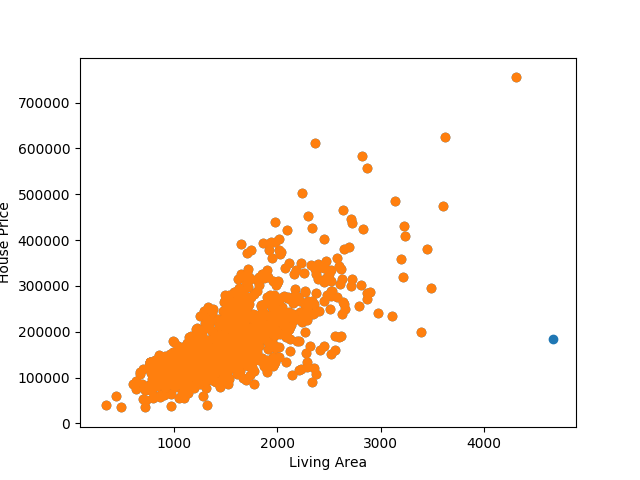

Text(0.5,0,'Living Area')

In [511]:
import matplotlib.pyplot as plt
%matplotlib notebook

plt.scatter(X_train['GrLivArea'],y_train)
plt.ylabel('House Price')
plt.xlabel('Living Area')

The plot above shows that there is an outlier beyond 4500 sqaure feet.  So, I'm going to delete that point.

In [512]:
def remove_outlier():
    mask = X_train['GrLivArea'] < 4500
    X_train_better = X_train[mask]
    y_train_better = y_train[mask]
    
    return X_train_better, y_train_better


In [513]:
X_train, y_train = remove_outlier()

In [514]:
plt.scatter(X_train['GrLivArea'],y_train)
plt.ylabel('House Price')
plt.xlabel('Living Area')

Text(0.5,23.5222,'Living Area')

In [519]:
linridge10 = Ridge(alpha=10).fit(X_train,y_train)
print("Training set score: {:.2f}".format(linridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(linridge10.score(X_test, y_test)))

Training set score: 0.94
Test set score: 0.71


<IPython.core.display.Javascript object>


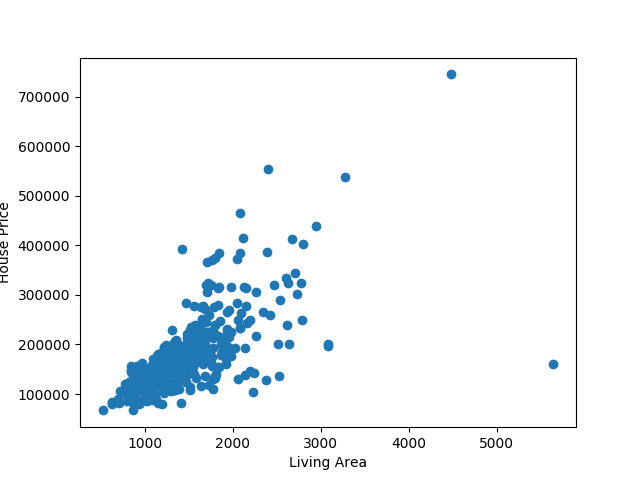

Text(0.5,0,'Living Area')

In [523]:
plt.figure()
plt.scatter(X_test['GrLivArea'],y_test)
plt.ylabel('House Price')
plt.xlabel('Living Area')

In [524]:
def remove_outlier_test():
    mask = X_test['GrLivArea'] < 5000
    X_test_better = X_test[mask]
    y_test_better = y_test[mask]
    
    return X_test_better, y_test_better


In [525]:
X_test, y_test = remove_outlier_test()

<IPython.core.display.Javascript object>


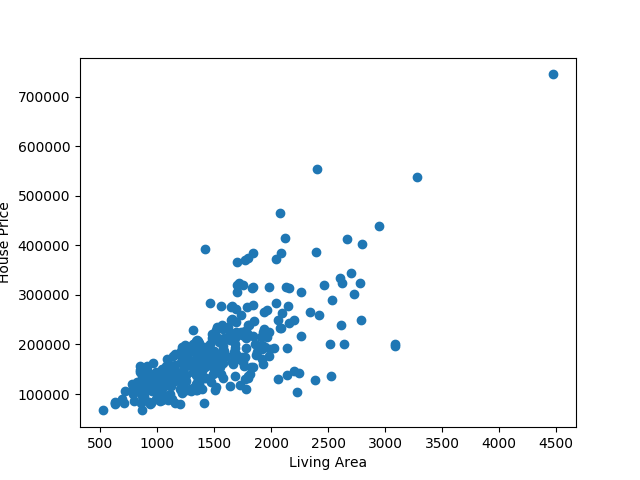

Text(0.5,0,'Living Area')

In [544]:
plt.figure()
plt.scatter(X_test['GrLivArea'],y_test)
plt.ylabel('House Price')
plt.xlabel('Living Area')

In [529]:
linridge10 = Ridge(alpha=10).fit(X_train,y_train)
print("Training set score: {:.2f}".format(linridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(linridge10.score(X_test, y_test)))

Training set score: 0.94
Test set score: 0.91


In [530]:
rmsle(y_test,linridge10.predict(X_test))

0.13188397366784296

In [541]:
grad_boost_lr01_nest1000_maxdep2 = GradientBoostingRegressor(learning_rate=.1, n_estimators=1000, random_state=0, max_depth=2).fit(X_train,y_train)

print("Training set score: {:.2f}".format(grad_boost_lr01_nest1000_maxdep2.score(X_train, y_train)))
print("Test set score: {:.2f}".format(grad_boost_lr01_nest1000_maxdep2.score(X_test, y_test)))

Training set score: 0.99
Test set score: 0.93


In [532]:
rmsle(y_test,grad_boost_lr01_nest1000_maxdep2.predict(X_test))

0.11632577591233718

In [542]:
price_prediction_grad_boost_ver3 = grad_boost_lr01_nest1000_maxdep2.predict(test_df3)
price_predict_grad_boost_ver3_df = pd.DataFrame(price_prediction_grad_boost_ver3,index=test_df3.index,columns=['SalePrice']) 
price_predict_grad_boost_ver3_df.to_csv('house_price_submission_GradientBoosting_ver3.csv')

Wow!  I submitted my Gradient Boosted Regression results to the Kaggle site and I moved up the leaderboard by 221 places.  I'm now ranked 1141/2572.  The only difference between this submission and the last submission is that I took out a single outlier data point from X_test and one from X_train.  That made a big difference!

<IPython.core.display.Javascript object>


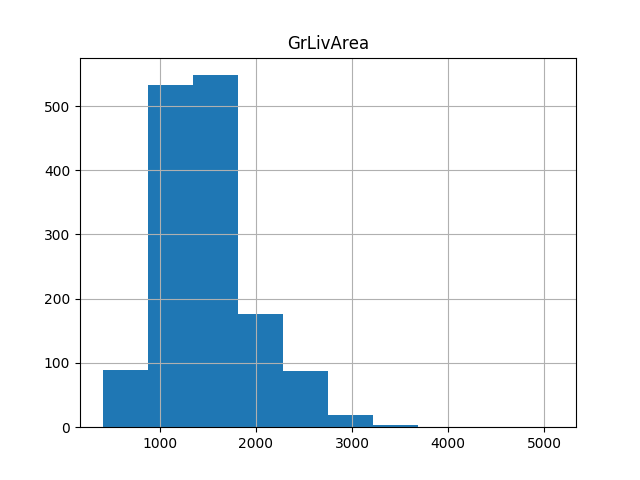

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1225c2550>]], dtype=object)

In [555]:
test_df3.hist(column='GrLivArea')

In [553]:
mask = test_df3['GrLivArea'] > 4500
mask.sum()

1

There is one value in the Test Data that has a living area of 4500 square feet.  We will assume that's an outlier point.  Therefore, we will replace that point with a house price that is 25% the predicted house price and see what happens.

In [557]:
mask.idxmax()

2550

In [567]:
price_prediction_grad_boost_ver4 = grad_boost_lr01_nest1000_maxdep2.predict(test_df3)
price_predict_grad_boost_ver4_df = pd.DataFrame(price_prediction_grad_boost_ver4,index=test_df3.index,columns=['SalePrice'])
price_predict_grad_boost_ver4_df.loc[2550] = 773794*0.25
price_predict_grad_boost_ver4_df.to_csv('house_price_submission_GradientBoosting_ver4.csv')

This didn't lead to improved performance.

Something I would like to try is taking the log of the feature 'GrLivArea'

In [568]:
X_train.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1293,70,6600,5,4,1892,1965,0.0,0,0,994,...,0,0,0,1,0,0,0,0,1,0
1019,80,10784,7,5,1991,1992,76.0,0,0,384,...,0,0,0,1,0,0,0,0,1,0
1214,80,10246,4,9,1965,2001,0.0,648,0,0,...,0,0,0,1,0,0,0,0,1,0
1431,60,21930,5,5,2005,2005,0.0,0,0,732,...,0,0,0,1,0,0,0,0,1,0
811,20,10140,6,6,1974,1999,99.0,663,377,0,...,0,0,0,1,0,0,0,0,1,0


<IPython.core.display.Javascript object>


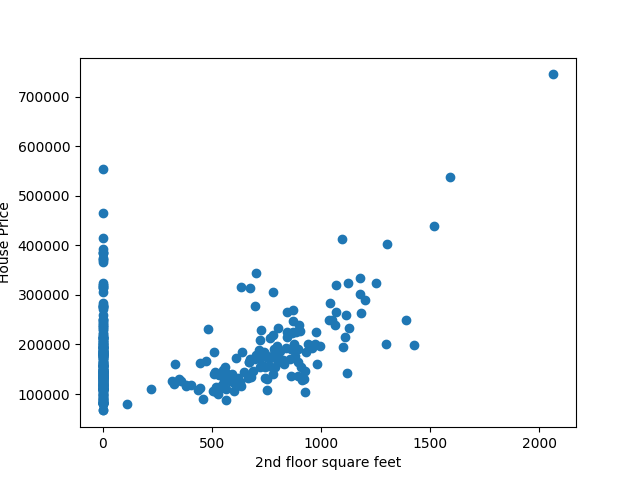

Text(0.5,0,'2nd floor square feet')

In [569]:
plt.figure()
plt.scatter(X_test['2ndFlrSF'],y_test)
plt.ylabel('House Price')
plt.xlabel('2nd floor square feet')

In [574]:
mask = X_test['2ndFlrSF']==0
mask.sum()

213